In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import datetime as dt
from pandas.plotting import table
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
data=pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
data=data.rename(columns={'approx_cost(for two people)':'approx_cost'})


In [5]:
data=data.drop(['url','dish_liked','phone'],axis=1) 

In [6]:
data.isnull().sum()

address               0
name                  0
online_order          0
book_table            0
rate               7775
votes                 0
location             21
rest_type           227
cuisines             45
approx_cost         346
reviews_list          0
menu_item             0
listed_in(type)       0
listed_in(city)       0
dtype: int64

In [7]:
data.rate=data.rate.fillna('NEW')
data.location=data.location.fillna('HSR')
data.rest_type=data.rest_type.fillna('Delivery')
data.cuisines=data.cuisines.fillna('Biryani')

In [8]:
#Some Transformations
data['approx_cost'] = data['approx_cost'].astype(str)
data['approx_cost'] = data['approx_cost'].apply(lambda x: x.replace(',','.'))
data['approx_cost'] = data['approx_cost'].astype(float)
data.approx_cost=data.approx_cost.fillna(data.approx_cost.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   address          51717 non-null  object 
 1   name             51717 non-null  object 
 2   online_order     51717 non-null  object 
 3   book_table       51717 non-null  object 
 4   rate             51717 non-null  object 
 5   votes            51717 non-null  int64  
 6   location         51717 non-null  object 
 7   rest_type        51717 non-null  object 
 8   cuisines         51717 non-null  object 
 9   approx_cost      51717 non-null  float64
 10  reviews_list     51717 non-null  object 
 11  menu_item        51717 non-null  object 
 12  listed_in(type)  51717 non-null  object 
 13  listed_in(city)  51717 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.5+ MB


In [9]:
data.isnull().sum()

address            0
name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
reviews_list       0
menu_item          0
listed_in(type)    0
listed_in(city)    0
dtype: int64

In [10]:
data = data.rename(columns={'approx_cost':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
data.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [11]:
#Removing '/5' from Rates
data['rate'].unique()
data = data.loc[data.rate !='NEW']
data = data.loc[data.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
data.rate = data.rate.apply(remove_slash).str.strip().astype('float')
data['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [12]:
# Adjust the column names
data.name = data.name.apply(lambda x:x.title())
data.online_order.replace(('Yes','No'),(True, False),inplace=True)
data.book_table.replace(('Yes','No'),(True, False),inplace=True)
data.cost.unique()

array([800.        , 300.        , 600.        , 700.        ,
       550.        , 500.        , 450.        , 650.        ,
       400.        , 900.        , 200.        , 750.        ,
       150.        , 850.        , 100.        ,   1.2       ,
       350.        , 250.        , 950.        ,   1.        ,
         1.5       ,   1.3       , 199.        ,   1.1       ,
         1.6       , 230.        , 130.        ,   1.7       ,
         1.35      ,   2.2       ,   1.4       ,   2.        ,
         1.8       , 360.72662008,   1.9       , 180.        ,
       330.        ,   2.5       ,   2.1       ,   3.        ,
         2.8       ,   3.4       ,  50.        ,  40.        ,
         1.25      ,   3.5       ,   4.        ,   2.4       ,
         2.6       ,   1.45      ,  70.        ,   3.2       ,
       240.        ,   6.        ,   1.05      ,   2.3       ,
         4.1       , 120.        ,   5.        ,   3.7       ,
         1.65      ,   2.7       ,   4.5       ,  80.  

In [13]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes'])]:
        data[column] = data[column].factorize()[0]
    return data

data = Encode(data.copy())

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

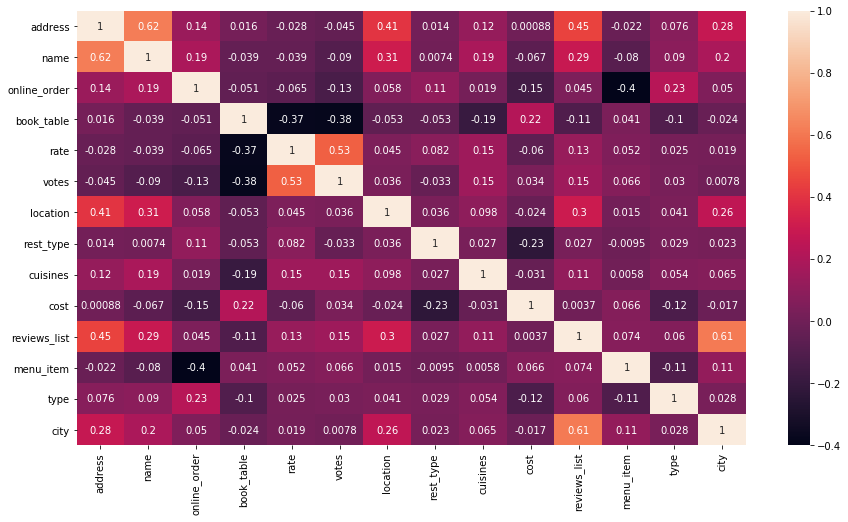

In [14]:
#Get Correlation between different variables
corr = data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
data.columns

Text(0.5, 1.0, 'Online Delivery Status')

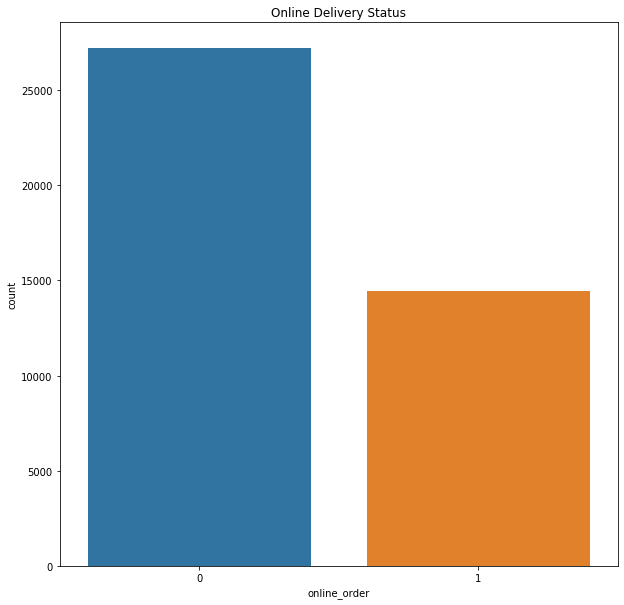

In [15]:
sns.countplot(data['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Online Delivery Status')

0 -> True 
1 -> False

Text(0.5, 1.0, 'Table booking Status')

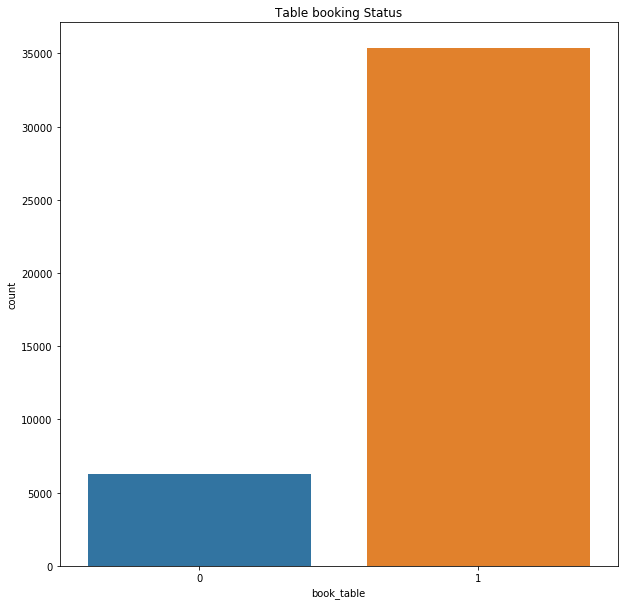

In [16]:
sns.countplot(data['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Table booking Status')

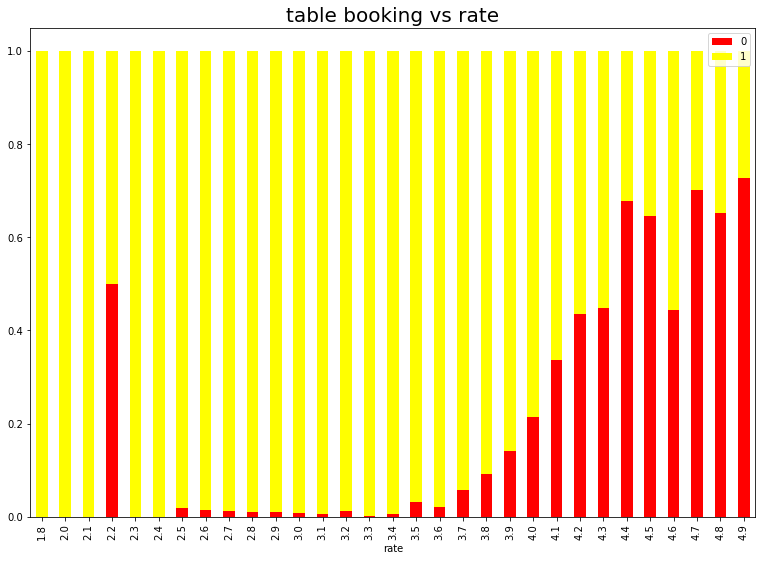

In [17]:
#Table booking Rate vs Rate
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(data['rate'], data['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

Text(0.5, 1.0, 'Location')

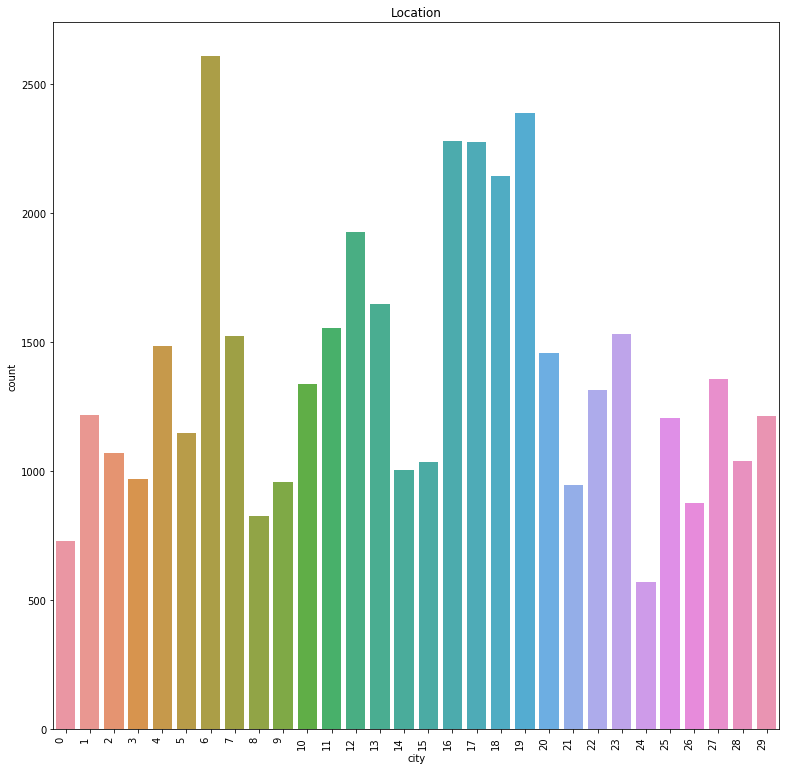

In [18]:
# Location
sns.countplot(data['city'])
sns.countplot(data['city']).set_xticklabels(sns.countplot(data['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location')

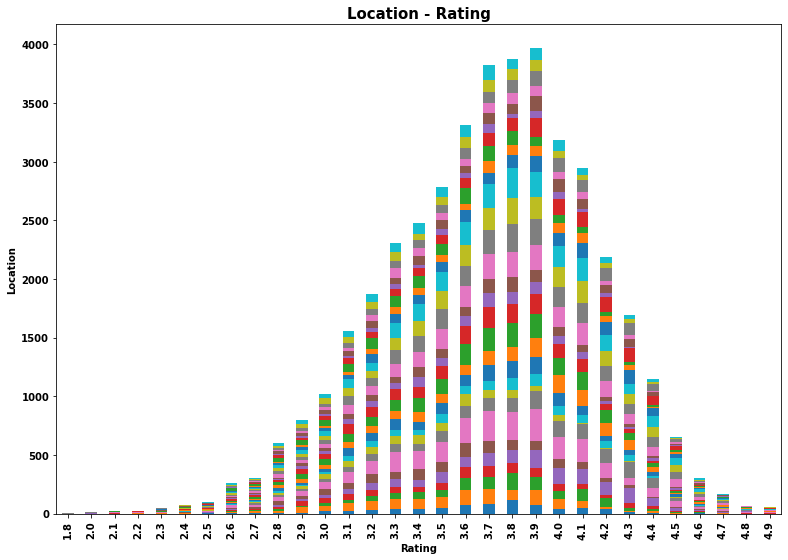

In [19]:
#Location and Rating
loc_plt=pd.crosstab(data['rate'],data['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();


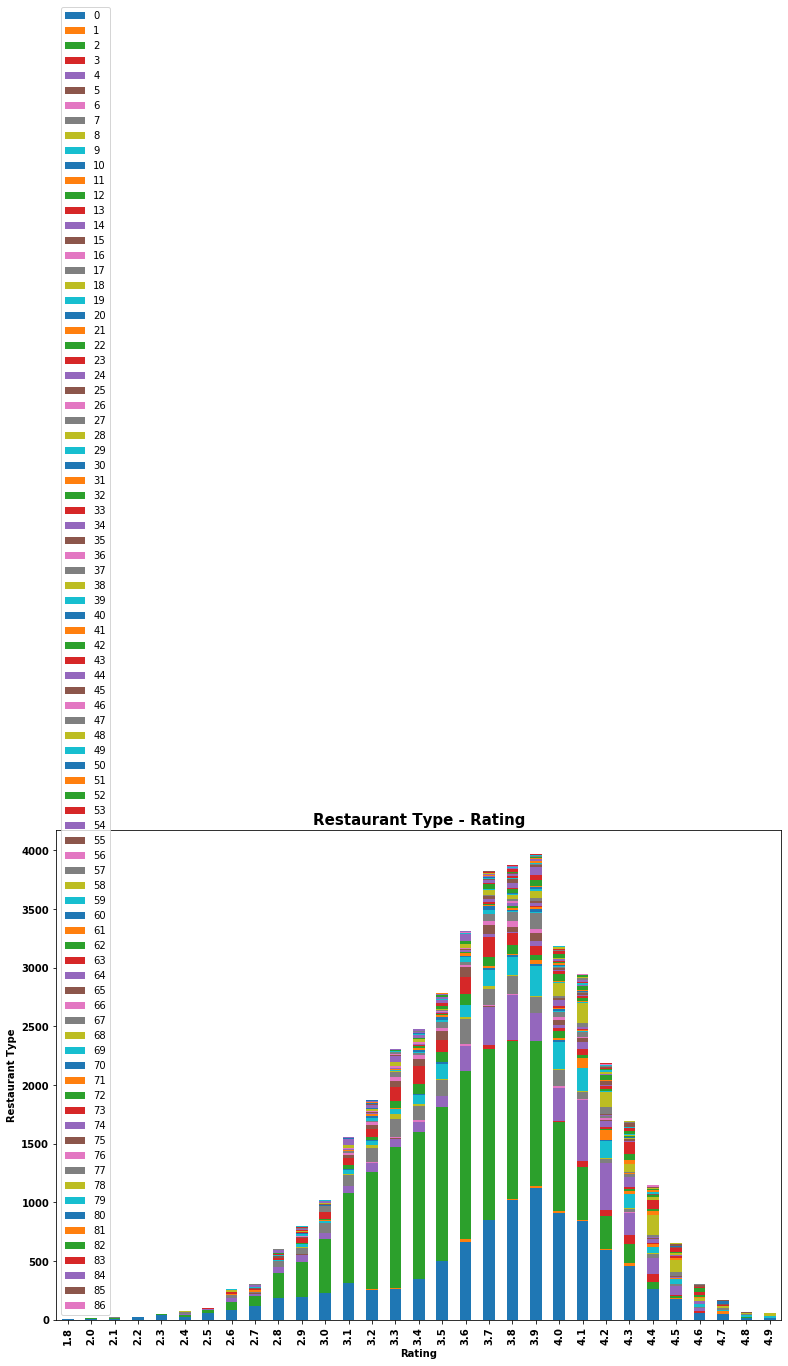

In [20]:
loc_plt=pd.crosstab(data['rate'],data['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Restaurant Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Restaurant Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();


Text(0.5, 1.0, 'Type of Service')

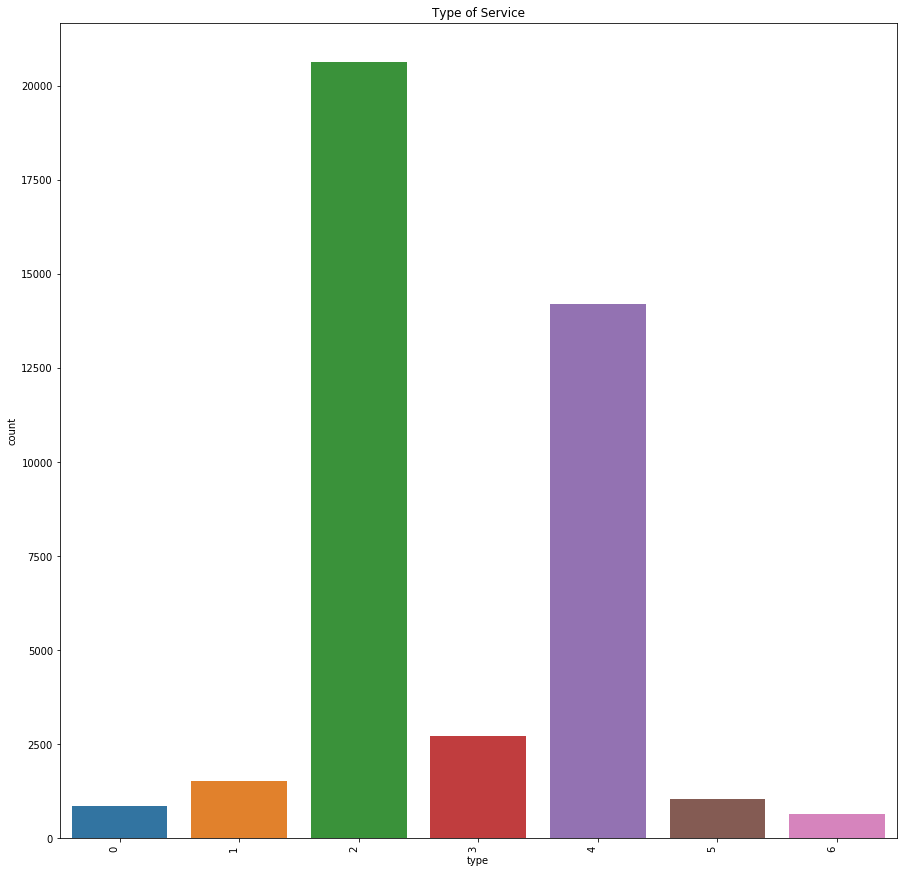

In [21]:
#Types of Services
sns.countplot(data['type'])
sns.countplot(data['type']).set_xticklabels(sns.countplot(data['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')

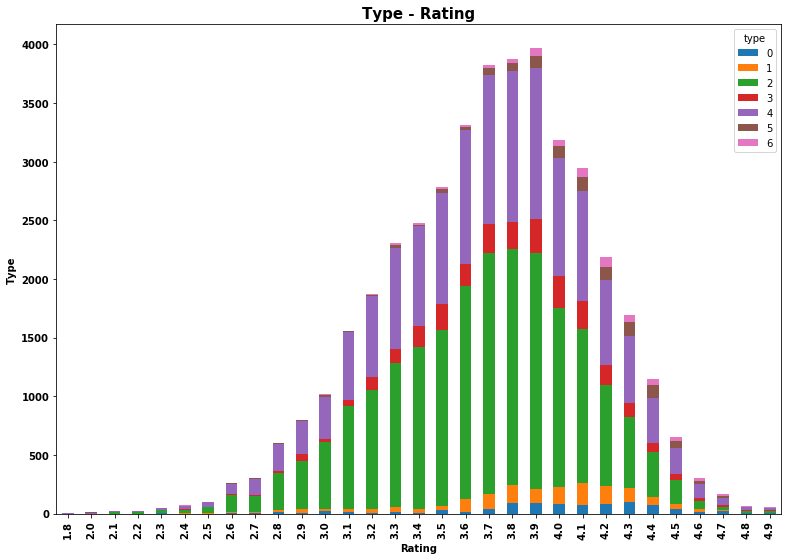

In [22]:
#Type and Rating
type_plt=pd.crosstab(data['rate'],data['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

Text(0.5, 0, 'Number of outlets')

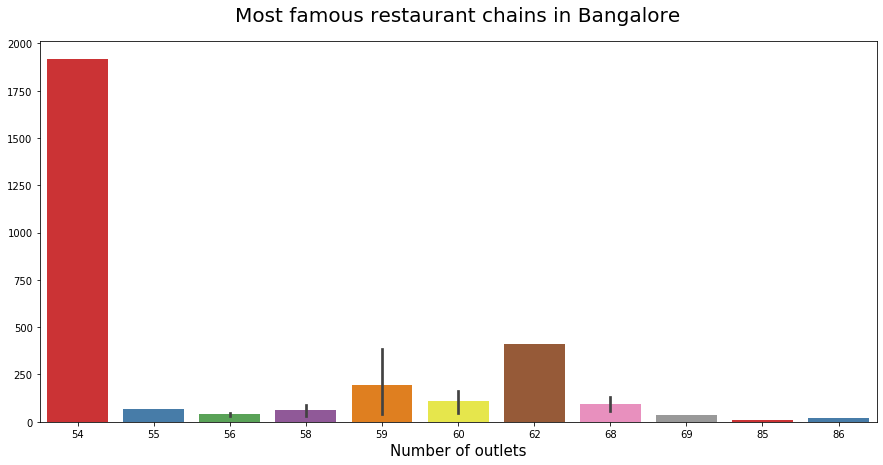

In [23]:
#Most famous restaurant chains in Bengaluru
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangalore",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

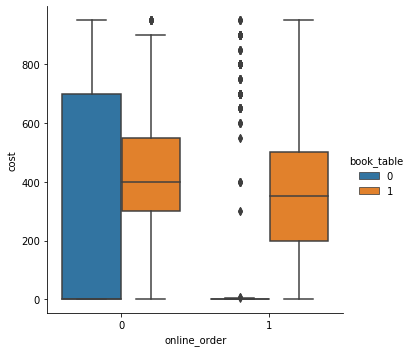

In [24]:
sns.factorplot(x="online_order", y="cost", hue="book_table", data=data, kind="box")
plt.show()

**Regression analysis**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [39]:
#Defining the independent variables and dependent variables
x = data.iloc[:,[2,3,5,6,7,8,9,11]]
y = data['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=20)
x_train.head()
y_train.head()

6826     3.0
22392    3.0
24601    4.0
30305    3.5
210      3.7
Name: rate, dtype: float64

In [40]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.8638459363743831

In [28]:
X = data.iloc[:,[2,3,5,6,7,8,9,11]]
y = data['rate']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state =0)

In [30]:
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.svm import SVR 
from sklearn.linear_model import Ridge as RR

In [31]:
models={'Linear Regression':LR(),'Decision Tree Regression':DTR(),'Random Forest Regression':RFR(),'Gradient Boosting Regression':GBR(),'Ada Boosting Regression':ABR(),'K-Neighbors Regression':KNR(),'Support Vector Regression':SVR(),'Ridge Regression':RR()}
pred =[]
print(models.keys())

dict_keys(['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Ada Boosting Regression', 'K-Neighbors Regression', 'Support Vector Regression', 'Ridge Regression'])


In [32]:
from sklearn.metrics import r2_score
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc=r2_score(y_test, predictions)
    pred.append(acc)
    print(name,acc)

Linear Regression 0.27768178253695586
Decision Tree Regression 0.8794677580017094
Random Forest Regression 0.9250998926963925
Gradient Boosting Regression 0.519873630842911
Ada Boosting Regression 0.272279440321863
K-Neighbors Regression 0.618291848585991
Support Vector Regression 0.3904782631585372
Ridge Regression 0.27768226203769386


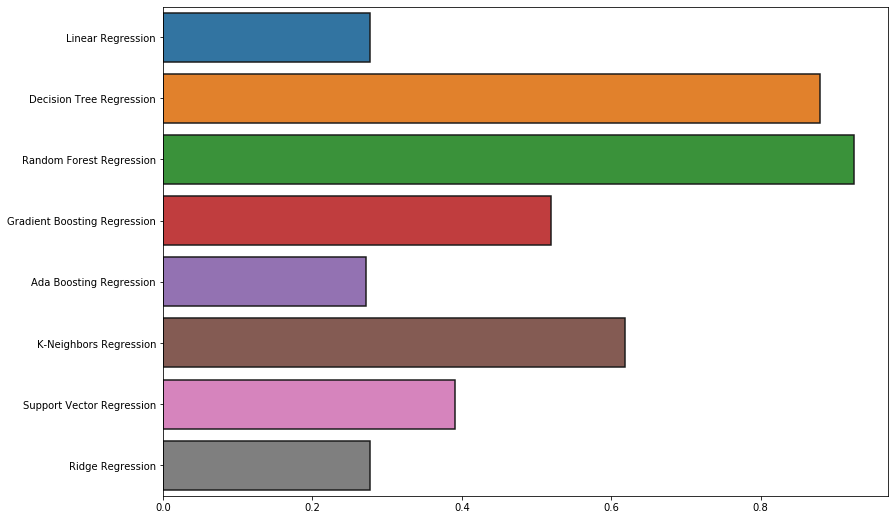

In [33]:
sns.barplot(y=list(models.keys()),x=pred,linewidth=1.5,orient ='h',edgecolor="0.1")

In [34]:
final = RFR()
final.fit(X_train,y_train)
final_pred = final.predict(X_test)

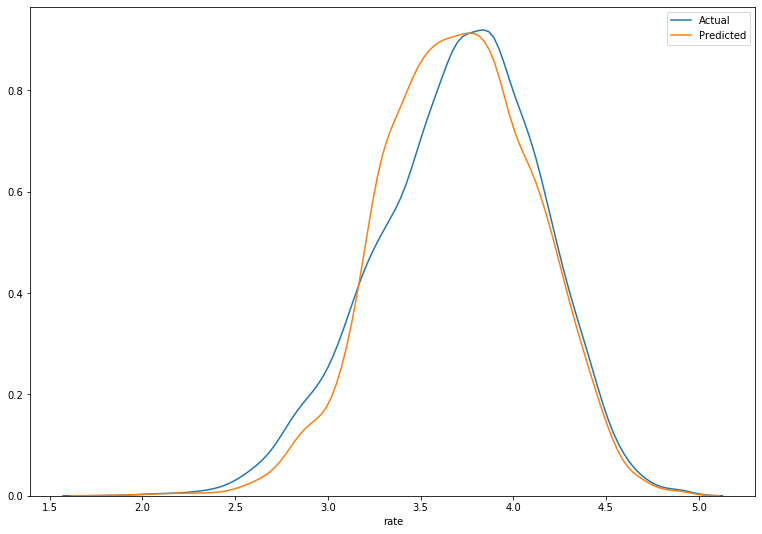

In [35]:
sns.distplot(y_test,hist = False,label ='Actual')
sns.distplot(final_pred,hist = False, label ='Predicted')